# Student performance, dataset analysis

### Data loading

In [2]:
import pandas as pd

data = pd.read_csv('data/student-mat.csv', sep=';', header='infer')

### Check rows and columns

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

We observe a total of 395 student profiles with no missing value in 'student-mat.csv' and a total of 33 variables with 17 of them being nominal variables.

Another observation that we can make is that several variables in the dataset can not be modified for a student and thus these variables can not be used to decide what kind of action we can make to improve the student performance, for example we can not tell a student that the average performance of female is better than male thus the student needs to change his gender in order to improve his performance. 

A lot of these variables are related to the background of the student, for example the status of the student's parents. We can safely hypothesis that depending on the background of the student, the variables such as goout which corresponds to the frequency of going out with friends will have different impact on the school performance. So what we can do is first separate from the dataset all the variables that are not useful for the decision-making process since they are mostly background information. Then we can group the different backgrounds into clusters in order to group students of similar background. And finally, we can exploit the remaining variables to see which of them has the most impact on the performance among student of similar background and give an advice based on it.

One drawback of the method is that some variables related to the background may be irrevelant, but since we are using them, we may create 2 different backgrounds due to them and when we try to find the importance of non-background-related variables for a given background, we may miss some important data that were stored in the other background. Another drawback is when the student in a certain background is the best student with for example a grade of 15, as such looking at similar background students won't help the student.

A priori, the background-related variables are : school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, failures, nursery, G1 and G2.  

The non-background-related variables that can be used for the decision-making advice would be : studytime, schoolsup, famsup, paid, activities, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health and absences.

We consider G3 as the final achievement of the student and the target variable that we want to improve through our advice, meanwhile G2 will represented the current level of the student.

### Looking for outliers

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


age and absences seem like to contain some extreme values, as the difference between the 3-quartile and the max value is quite sharp. Let's look at absences :

Text(0.5, 1.0, 'absences distribution')

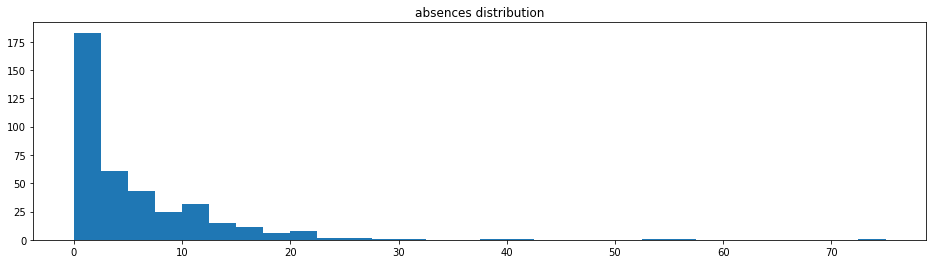

In [5]:
import matplotlib.pyplot as plt

absences = data['absences']

plt.figure(figsize=(16,4))
plt.hist(absences, bins = 30)
plt.title('absences distribution')

Looking at the absences distribution, we observe that it is unequal with outliers when absences is greater than 20. It may be interesting to group absences into categories of absences.

Text(0.5, 1.0, 'G3 distribution among students with more than 20 absences')

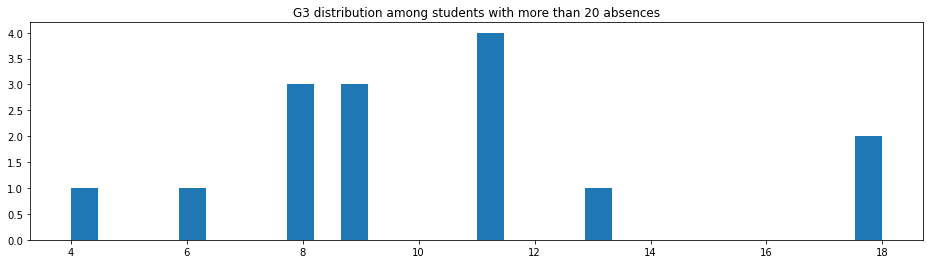

In [7]:
g3_absences_20 = data.iloc[(absences > 20).to_numpy()]['G3']
plt.figure(figsize=(16,4))
plt.hist(g3_absences_20, bins = 30)
plt.title('G3 distribution among students with more than 20 absences')

The repartition is spread out and it seems like that high absenteism is not a reason for bad grades.

### Missing data ?

In [8]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### Variable correlations

In [9]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Looking at the correlation matrix and the nominal variables:
1) G1 and G2 are extremely correlated (r = 0.85) and we can safely remove G1 and keep G2 in the dataset.

2) The parents' education are also related (r = 0.62).

3) The alcohol consumption during schoolday and the weekend are related (r = 0.64) and we may consider removing both of them to replace them with a simple variable alcohol_consumption.

4) While not in the table due to them being nominal variables, schoolsup, famsup and paid can be grouped into a single variable "additional_classes" as they convey the same idea that the student is taking more classes.

### Data processing

In [10]:
y = data['G3']
X = data.drop(['G3','G1'], 1)

background_variables = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","guardian","traveltime","failures","nursery","G2"]
predictor_variables = ["studytime","schoolsup","famsup","paid","activities","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences"]
X_background = X[background_variables]
X_advice = X[predictor_variables]

In [11]:
X_background.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,failures,nursery,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,0,yes,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,0,no,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,3,yes,8
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,0,yes,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,0,yes,10


Transform nominal variables into categorical :

In [12]:
columns_name = []
for name in X_background.columns:
    if X_background[name].dtype == 'object':
        columns_name.append(name)

X_background_numeric = pd.get_dummies(X_background, columns = columns_name, drop_first = True)

In [13]:
X_background_numeric.head()

,age,Medu,Fedu,traveltime,failures,G2,school_MS,sex_M,address_U,famsize_LE3,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,nursery_yes
0,18,4,4,2,0,6,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,17,1,1,1,0,5,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,15,1,1,1,3,8,0,0,1,1,...,0,1,0,0,0,1,0,1,0,1
3,15,4,2,1,0,14,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
4,16,3,3,1,0,10,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [14]:
columns_name = []
for name in X_advice.columns:
    if X_advice[name].dtype == 'object':
        columns_name.append(name)

X_advice_numeric = pd.get_dummies(X_advice, columns = columns_name, drop_first = True)

### General model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_advice_numeric.to_numpy(), y.to_numpy(), test_size=0.3, random_state=103)

train_score = []
test_score = []
# we test the max_depth hyperparameter
for i in range(2,8):
    average_train_score = []
    average_test_score = []
    for j in range(10):
        regr = RandomForestRegressor(max_depth=i, n_estimators=50)
        regr.fit(X_train, y_train)
        average_train_score.append(regr.score(X_train,y_train))
        average_test_score.append(regr.score(X_test,y_test))
        
    train_score.append(sum(average_train_score)/len(average_train_score))
    test_score.append(sum(average_test_score)/len(average_test_score))

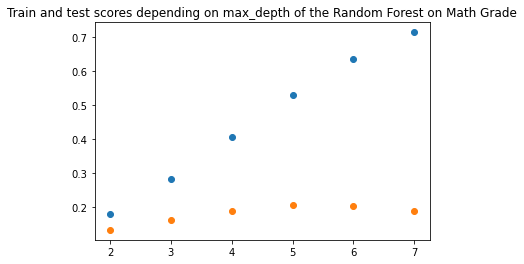

In [16]:
plt.scatter(range(2,8), train_score)
plt.scatter(range(2,8), test_score)
plt.title('Train and test scores depending on max_depth of the Random Forest on Math Grade')
plt.show()

RandomForest trained on all available data is unable to explain well from the non-background-related variables why a student perform well or not.

### Personalized Solution

In [17]:
from sklearn.cluster import KMeans

X_background_array = X_background_numeric.to_numpy()
kmeans = KMeans(n_clusters=17, random_state=0).fit(X_background_array)

We optimize the number of clusters by deciding to add cluster until the cluster size repartition become uneven.

In [18]:
import numpy as np
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [29 28 17 27 17 13 27 23 26 10 33 19 22 26 25 19 34]


Use-case, let's assume that our student belongs to the cluster 4, we choose to get all student with similar background to him in the dataset by getting all the student in cluster 4.

In [19]:
X_advice_cluster = X_advice.iloc[kmeans.labels_ == 4]
y_cluster = y.iloc[kmeans.labels_ == 4]

In [20]:
columns_name = []
for name in X_advice_cluster.columns:
    if X_advice_cluster[name].dtype == 'object':
        columns_name.append(name)

X_advice_cluster_numeric = pd.get_dummies(X_advice_cluster, columns = columns_name, prefix = columns_name, drop_first = True)
X_advice_cluster_array = X_advice_cluster_numeric.to_numpy()
y_cluster_array = y_cluster.to_numpy()

Now among all of these students from the same cluster, we wish to see the importance of non-background related variables in determining their achievement. To do so, we will exploit the in-built feature importances in the RandomForest algorithm of sklearn.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut

# since we are dealing with extremely small dataset, we use LeaveOneOut cross-validation.
loo = LeaveOneOut()
train_score = []
test_rmse_score = []
for train_index, test_index in loo.split(X_advice_cluster_array):
    X_train, X_test = X_advice_cluster_array[train_index], X_advice_cluster_array[test_index]
    y_train, y_test = y_cluster_array[train_index], y_cluster_array[test_index]
    # 10 trees as the biggest cluster is of size 39
    regr = RandomForestRegressor(n_estimators=10, max_depth=4)
    regr.fit(X_train, y_train)
    train_score.append(regr.score(X_train, y_train))
    test_rmse_score.append(abs(regr.predict(X_test)[0]-y_test[0]))

Optimization of max depth by looking at the evolution of train_score and test_rmse_score

In [22]:
sum(train_score)/len(train_score)

0.7912053222313901

In [23]:
print("RMSE test score :",sum(test_rmse_score)/len(test_rmse_score))

RMSE test score : 0.7549019607843137


In [24]:
pd.DataFrame([regr.feature_importances_], columns=X_advice_cluster_numeric.columns).iloc[0]

studytime         0.201087
famrel            0.232854
freetime          0.089050
goout             0.107280
Dalc              0.000000
Walc              0.077316
health            0.006700
absences          0.222858
famsup_yes        0.023346
paid_yes          0.000000
activities_yes    0.000000
romantic_yes      0.039509
Name: 0, dtype: float64

Now that we have the feature importances, we can sort it and list the features according to its importance and we know what kind of action to put in priority. For example, we will first check the quality of the student family relationship, then we will check if the student is missing too much classes, etc.

One thing missing here is the cost of an action, we may try to improve first the relation between the student and its parents to improve its study environment but if the action is too costly we may think about trying to encourage no skipping classes, etc.

### Conclusion

We were able to create a pipeline in which we could group student of similar backgrounds. By looking at students from similar background, we were able to establish within this group which variables affected the most the student performance and from this we were able to choose which action to priotize.

One drawback of the method happen when for example the student in the cluster happened to be the best student, or when all student from the same cluster happen to have the same grade. On such a case, we are unable to give any good personalized advice. Trying to have a general model with all the student profiles is unfortunately also not working and we are unable to derive good general advices.

A possible solution to tackle the drawback of the method is to create an extended model in which we do not only create a model from a single cluster, but from multiple clusters that are close to the student profile. And on such the case, it may be worth to use a 2d-Kohonen map to perform the clustering, as finding cluster neighborhood become trivial.

Finally, we made an application based on this notebook.